**1) DATA DESCRIPTION**

In [3]:
library(tidyverse)
# players dataset description
players1 <- read_csv("players.csv")
players_rows <- nrow(players1)
players_rows
experience_summary <- table(players$experience)
subscribe_summary <- table(players$subscribe)
played_hours_average <- mean(players$played_hours)
gender_summary <- table(players$gender)
Age_average <- mean(players$Age, na.rm = TRUE)
experience_summary
subscribe_summary
played_hours_average
gender_summary
Age_average

# sessions dataset description
sessions1 <- read_csv("sessions.csv")
sessions_rows <- nrow(sessions1)
sessions_rows
original_start_time_average <- mean(sessions$original_start_time, na.rm = TRUE)
original_end_time_average <- mean(sessions$original_end_time, na.rm = TRUE)
original_start_time_average
original_end_time_average

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196


 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 


FALSE  TRUE 
   52   144 

[1] 5.845918


          Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                1                11                 6 

[1] 21.13918

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1535

[1] 1.719201e+12

[1] 1.719196e+12

The dataset consists of two files, the players.csv file which includes data on each individual player and the sessions.csv file which includes the unique play sessions of each individual player as well as data about the session. I have organized the data description by file below. 

The **players.csv** file consists of 196 observations and has the following variables:
|Variable Name|Variable Type|Variable Meaning|
|-------------|-------------|----------------|
|experience|chr|indicates the experience level of the individual player described using 5 categories: Amateur, Beginner, Pro, Regular and Veteran|
|subscribed|lgl|This variable indicates whether or not the individual player is subscribed or not|
|hashedEmail|chr|This is the individual's hashed email|
|played_hours|dbl|This variable reports the amount of hours played on MineCraft by each individual|
|name|chr|This reports each inidivual player's name|
|gender|chr|This reports each individual player's gender|
|Age|dbl|This reports each individual player's age|

And the following summary statistics:
|Variable|Summary|
|--------|----|
|experience|In summary, this dataset has 63 amateur players, 35 beginners, 14 pros, 36 regulars and 48 veteran players|
|subscribed|52 players were unsubscribed and 144 were subscribed|
|hashedEmail|N/A|
|played_hours|the average number of hours played amongst all the individuals was 5.85 hours|
|name|N/A|
|gender|Amongst the players 37 were female, 124 male, 2 agender, 15 non-binary, 6 two-spirited, 11 preferred not to say and 1 other|
|Age|the average age of the players is 21.14|

The **sessions.csv** file consists of 1535 observations and has the following variables:
|Variable Name|Variable Type|Variable Meaning|
|-------------|-------------|----------------|
|hashedEmail|chr|This reports the hashed email for each unique player|
|start_time|chr|This indicates the start time and day for each individual player's session|
|end_time|chr|This indicates the end time and day for each individual player's session|
|original_start_time|dbl|This variable indicates the same values as in the start_time but in milliseconds|
|original_end_time|dbl|This variable indicates the same values as in the end_time but in milliseconds|

and the following summary statistics:
|Variable|Summary|
|--------|-------|
|hashedEmail|N/A|
|start_time|N/A|
|end_time|N/A|
|original_start_time|the average start time in UNIX time (milliseconds) is 1.72E+12|
|original_end_time|the average end time in UNIX time (milliseconds) is 1.72E+12|

Some issues that I see in the data, that could potential become issues in the future is the UNIX time values for the sessions file part of the dataset, this is because since the numbers are soo big, it's hard to see that there's any difference between values if you're rounding the numbers to 2 decimal places.

All this data was collected by creating a MineCraft server that tracks and record the individual player's actions as they play MineCraft in this specific server. 

**2) QUESTIONS**

The one broad question I will be addressing is question 3: *What time windows are most likely to have large numbers of simultaneous players?* The specific question that I have formulated based on this broad question is: *Can the experience level of a player predict the peak in simultaneous players in the MineCraft datasets?* The data will help me address my question as I can compare the experience levels of individual players to the time of day that they log into the server and I can use these variables to see if there is an overlap between the experience level of the player and their session time. This can overlap can help determine if there is a correlation between experience level and the peak time that players were simultaneously active. 

**3) EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

In [5]:
# loading dataset into R
library(tidyverse)

players_data <- read_csv("players.csv")
sessions_data <- read_csv("sessions.csv")
players_data
sessions_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [10]:
# minimum necessary wrangling to turn data into tidy format
library(tidyverse)
players_wrangled <- select(players_data, experience, hashedEmail, played_hours)
players_wrangled

experience,hashedEmail,played_hours
<chr>,<chr>,<dbl>
Pro,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3
Veteran,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8
Veteran,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0
Amateur,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7
Regular,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1
Amateur,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0
Regular,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0
Amateur,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0
Amateur,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1


For the data wrangling, I chose to extract some columns from the players.csv file that I thought was most relevant to my specific question. I didn't have to organize either data sets in terms of making it tidy, this is because both data sets are already tidy. They both have single variable columns, each row is a single observation and each cell is a single value. I felt that there wasn't really anything that could have made the data any more tidy, so besides extracting relevant columns, I didn't change anything else.

In [12]:
# mean value for each quantitive variable in the player.csv file
played_hours_mean <- mean(players_data$played_hours, na.rm = TRUE)
age_mean <- mean(players_data$Age, na.rm = TRUE)
played_hours_mean
age_mean

[1] 5.845918

[1] 21.13918

Mean values for the quantitative variables in *players.csv*:
|VARIABLE|MEAN VALUE|
|--------|----------|
|played_hours|5.85|
|age|21.14|

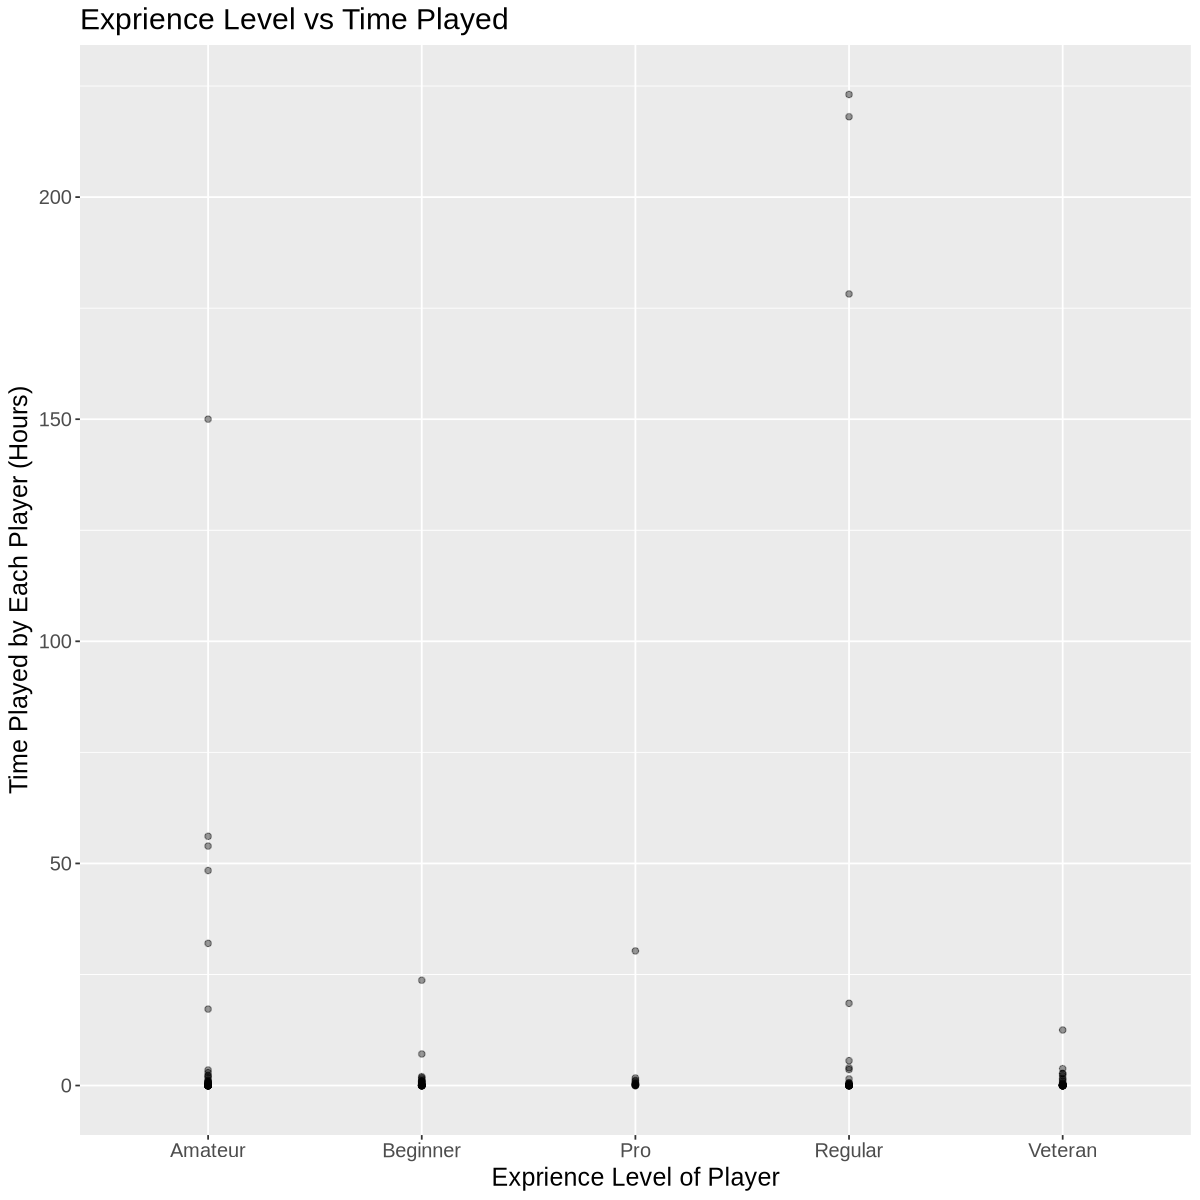

In [31]:
# exploratory visualizations of the data
options(repr.plot.width = 10, repr.plot.height = 10)
players_plot <- ggplot(players_data, aes(x = experience, y = played_hours)) +
    geom_point(alpha = 0.4) +
    xlab("Exprience Level of Player") +
    ylab("Time Played by Each Player (Hours)") +
    ggtitle("Exprience Level vs Time Played") + 
    theme(text = element_text(size = 15))
players_plot

Some insights I've gained through these plots are that most players, no matter what their experience level is, it seems as if most players play around the same amount each session. Thus is relevant in addressing my question because it shows that there might actually not be any sort of correlation between a players experience level and the amount of time they play each session. 

**4) METHODS AND PLAN**

The method I plan on using to adress my question is linear regression with experience as a factor variable. This method is appropriate because it tells how each experience level will vary in time frames that they are most active. By getting this information, we can interpret the peak times that most players are active and see which experience level stands out in that time frame. This method does require us to assume that they will be a difference between each experience level to find a correlation between experience level and the peak playing times; if this is not the case, then we can only assume that there is no correlation between the two variables. Some limitations to the method selected is that the analysis might not be as accurate becasue the method has to convert the character variable, experience into dummy factors that will as as placeholders during the analysis. To compare and select the model, we want to prioritzie performance more than accuracy, therefore we can do things like examine th p-value and R^2 to make sure that there is a significant enough difference between the timeframes for each experience level. The way I am going to process this data to apply to the model is by combining btoh data sets using hashed email to align the observations correctly. Then I will mutate a new model that depicts the time frame (start to end time) that the player played. I likely won't be splitting the data as it is a very simple single predictor dataset. Also since the method is intended to examine the differences in session time frame and exprience and NOT to predict future data, a cross-validation is not needed.

**5) GITHUB REPOSITORY**

https://github.com/vyang06/vicky_project_planning_stage.git 